# Description of the Dataset

The California Housing Dataset

The data contains information from the 1990 California census. The following section describes each feature:

There are 10 attributes in the dataset. They are:

longitude - A measure of how far west a house is; a higher value is farther west

latitude - A measure of how far north a house is; a higher value is farther north

housing_median_age - Median age of a house within a block; a lower number is a newer building

total_rooms - Total number of rooms within a block

total_bedrooms - Total number of bedrooms within a block

population - Total number of people residing within a block

households - Total number of households, a group of people residing within a home unit, for a block

median_income - Median income for households within a block of houses (measured in tens of thousands of US Dollars)

median_house_value - Median house value for households within a block (measured in US Dollars)  - Target Variable

ocean_proximity - Location of the house w.r.t ocean/sea

In [1]:
!pip install xgboost

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import probplot
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading dataset

df = pd.read_csv(r"C:\Users\pritam\Downloads\1553768847-housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# EDA

In [5]:
# shape of the dataset

df.shape

(20640, 10)

In [6]:
# printing list of columns

df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [7]:
# checking data types of all columns

print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object


The data type of all attributes is float64 and int except the column "ocean_proximity" which contains categorical data.

In [8]:
# checking NA values
df.isnull().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Only 1 attribute have missing value i.e "total_bedrooms"

In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [10]:
# summary statistics

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Key insights:

Count (20640): This means there are twenty-six thousand six hundred forty data points for each variable in our dataset and no missing values.

Mean: The average value of every column, this is 206,855.82 dollars which indicate the average price of the house in this data.

Standard Deviation (std): This indicates how much variation or dispersion from the mean. For example, we can tell that median_house_value has a variety of prices since it has a standard deviation of $115395.62.

Minimum (min): This is the smallest number from all columns. Hence, according to median_house_value minimum value is $14,999 meaning that there are homes with low costs in this dataset.

25th Percentile (25%): It shows the demarcation below which 25% of the points lies, for instance 25% houses have median_house_value < $119600.

Median (50% / 50th Percentile): The middle most value when data is sorted; e.g., housing_median_age has a median value of 29 years hence half of the houses are older than twenty-nine years while the other half are younger than twenty-nine years old.

75th Percentile (75%): This is just maximum numbers from all columns-the highest possible limit for them; also known as capped values. According to above results maximum price was $500001 for median_house_value which looks like probably a ceiling on prices in this dataset; thus it can be taken as an outlier.

housing_median_age: This housing_median_age ranges from 1 to 52 years with a median age of 29, which implies that the houses are not all new.

Statistics on Rooms and Population: The number of rooms range, number of bedrooms, population, and households are not uniform suggesting some small as well as large households in the data set.

House Values and Income: The median_income is highly variable (mean = 3.87) with likely figures being in tens of thousands of dollars, while median_house_value ranges greatly pointing to differences in income levels and house values.

In [11]:
# for ocean_proximity

df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

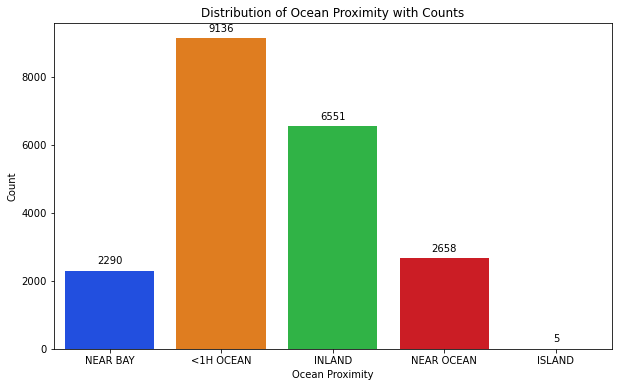

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='ocean_proximity', palette='bright')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Distribution of Ocean Proximity with Counts')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')

plt.show()

Concentration Around the Ocean: The majority of the data points are concentrated in the <1H OCEAN and INLAND categories. This indicates that most of the properties are either close to the ocean or located inland, with fewer properties near the bay or on an island.

Rare Island Properties: The very small number of island properties suggests that houses on island are expensive.

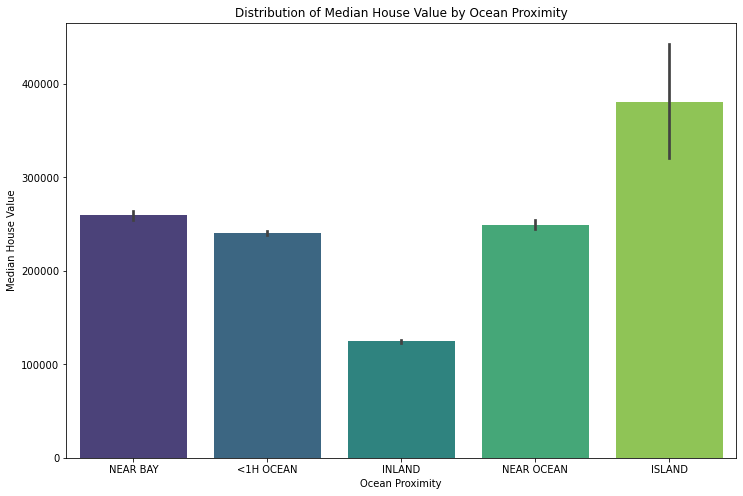

In [13]:
# showing distribution of median house value by ocean proximity

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='ocean_proximity', y='median_house_value', palette='viridis')


plt.title('Distribution of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')

plt.show()

ISLAND: The median house value for ISLAND stands at almost $450,000, which is the highest of all categories. This category exhibits a higher mean house value variability or uncertainty as indicated by the long error bar above.

NEAR BAY and <1H OCEAN: There are approximately 300,000 dollars in median house prices for both these categories. Data inconsistency is minimal shown by the tiny error bars.

NEAR OCEAN: NEAR BAY and <1H OCEAN have slightly higher median house values as compared to this category at roughly $275,000.

INLAND: The INLAND group has a small error bar and thus a low data variability; hence its lowest average home prices of about $150,000.

On ISLAND locations houses tend to have their medians significantly higher than other categories which could be due to island properties being at a premium price rate.

INLAND properties with the least median home values are probably less attractive because they are located far from the ocean. Except for INLAND, proximity to sea seems generally to increase median housing prices.

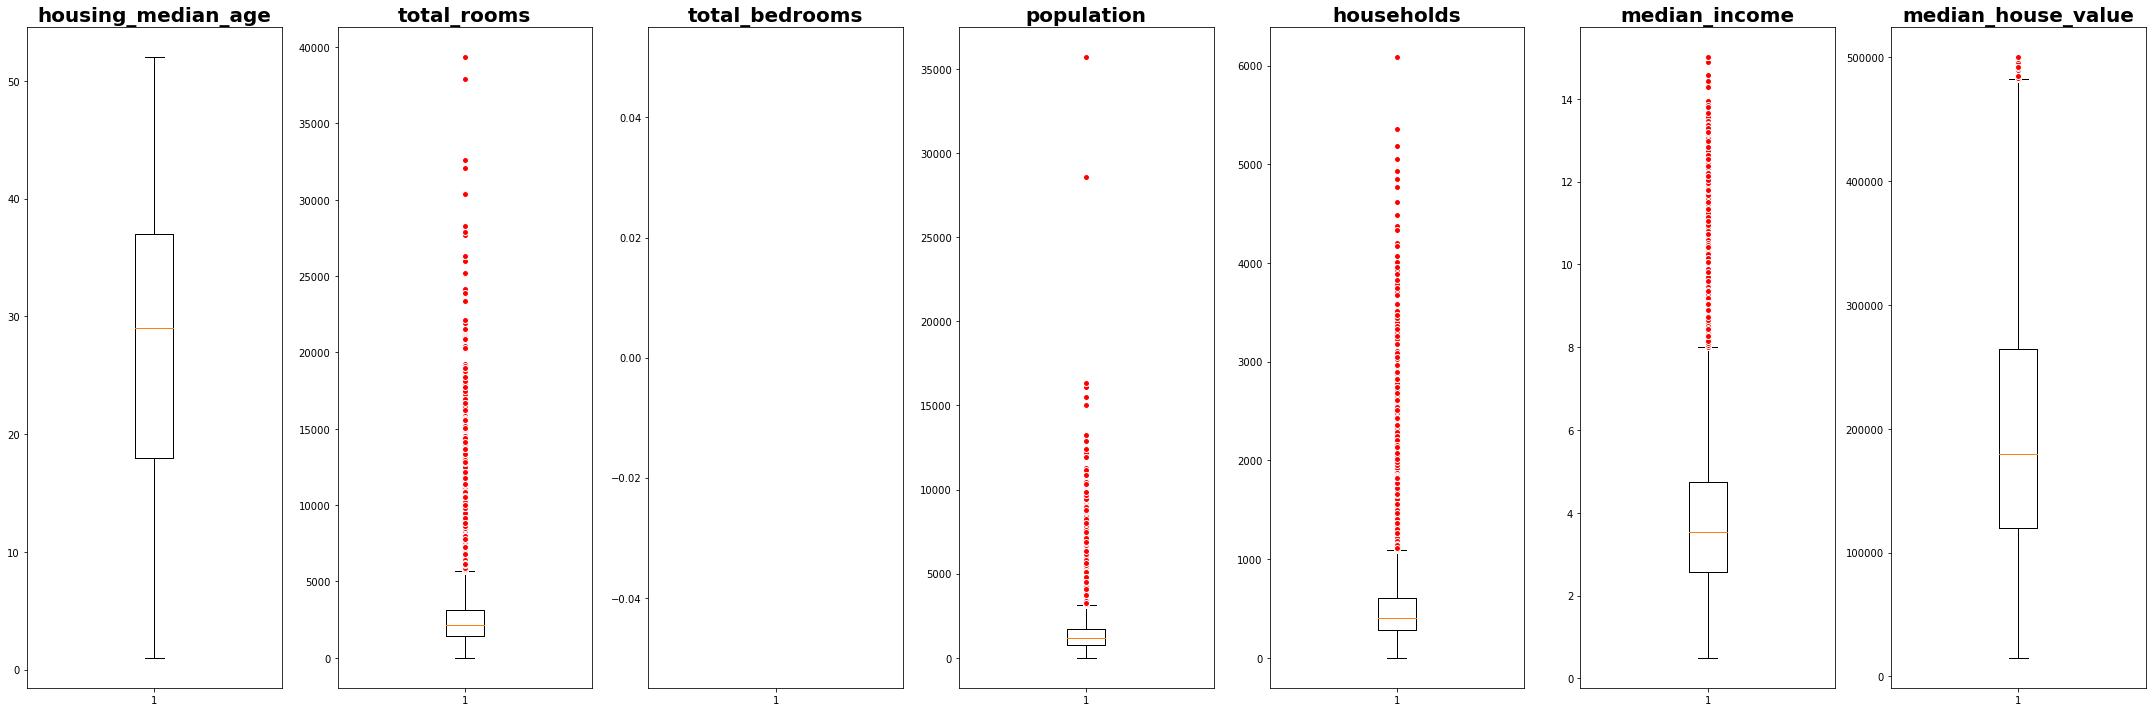

In [14]:
#boxplot

selected_columns = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
df_selected = df[selected_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(ncols=len(selected_columns), nrows=1, figsize=(30, 10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_selected.iloc[:, i], flierprops=red_circle)
    ax.set_title(df_selected.columns[i], fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()


Creating a boxplot of the columns, we can see outliers in features, such as total_rooms, total_bedrooms, population, households, and median_income. 
Outliers are usually part of the data in real estate since there are features related to luxury houses, unique locations, or great renovations. Because they might represent important real phenomena, it is very well possible. We will keep it at this point with the outliers present to build our model, and when we face accuracy issues, we can consider removing it later.

## Handling Outliers by identifying and removing them

In [15]:
# Dictionary to store the count of outliers for each column
outliers_count = {}

# Print the shape of the DataFrame before removing outliers
print(f"Original data shape: {df.shape}")

# Loop through each selected column to identify and remove outliers
for column in selected_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Count the outliers
    outliers_count[column] = len(outliers)
    
    # Remove outliers from the DataFrame
    df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

# Print out the number of outliers for each column
for column, count in outliers_count.items():
    print(f"{column}: {count} outliers")

# Print the shape of the DataFrame after removing outliers
print(f"Data shape after removing outliers: {df.shape}")



Original data shape: (20640, 10)
housing_median_age: 0 outliers
total_rooms: 1287 outliers
total_bedrooms: 556 outliers
population: 483 outliers
households: 180 outliers
median_income: 594 outliers
median_house_value: 638 outliers
Data shape after removing outliers: (16902, 10)


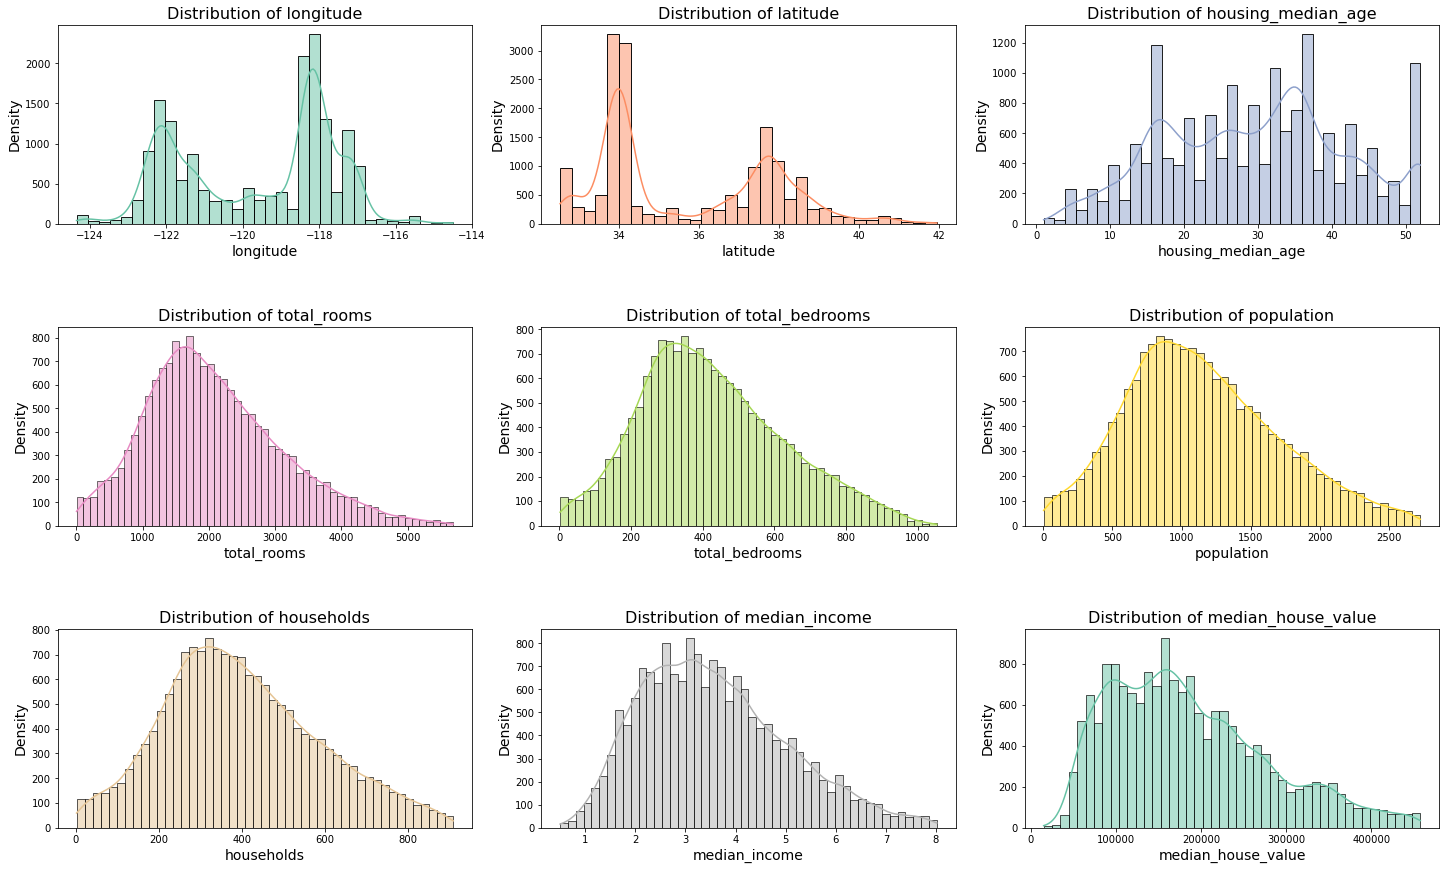

In [16]:
# Distribution plot

selected_columns = df.drop('ocean_proximity', axis = 1)

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 12))
axs = axs.flatten()

#colors for different columns
colors = sns.color_palette('Set2', len(selected_columns))

for index, (col, color) in enumerate(zip(selected_columns, colors)):
    sns.histplot(df[col], kde=True, ax=axs[index], color=color)
    axs[index].set_title(f'Distribution of {col}', fontsize=16)
    axs[index].set_xlabel(col, fontsize=14)
    axs[index].set_ylabel('Density', fontsize=14)

#Adjust layout to prevent overlap
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

plt.show()

The dataset shows that most of the numerical variables have considerable skewness, especially total_rooms, total_bedrooms, population, and households— this indicates a large percentage of small-sized homes and communities. The distributions for median_house_value and median_income suggest the availability of values over a wide range with higher concentrations in the lower-middle income and house value range. The geographic data(longitude and latitude) show clustering based on specific regions in California. 

longitude, latitude, and housing_median_age look to have bimodal distributions

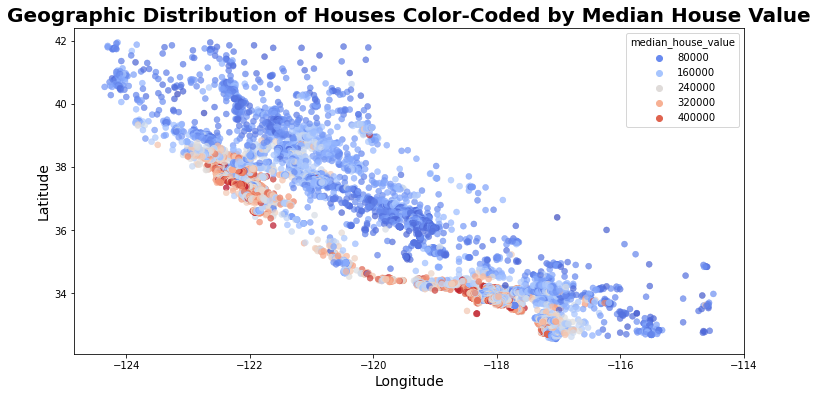

In [17]:
# Scatter plot for longitude and latitude

plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', palette='coolwarm', alpha=0.7, edgecolor=None)

plt.title('Geographic Distribution of Houses Color-Coded by Median House Value', fontsize=20, fontweight='bold')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

plt.show()


This graph shows the distribution of houses across California, with each point representing a house and its colour indicating the median house value.

Blue Dots: Represent homes with lower median values (100,000 to 200,000) or less expensive houses. These are the most common type of housing unit and are found throughout most of the state, especially in rural or inland areas.

Red Dots: Stand for more expensive homes (up to $500,000 on average). These are concentrated heavily in certain parts of the state, likely close to major urban centres or along desirable coastal regions such as around the San Francisco Bay Area or parts of Southern California.

Value Distribution: The variation in house values reveals... where coastal and urban areas (darker red colours) tend to have higher house prices while more inland and less populated areas have lower house prices (lighter blue).

In [18]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200


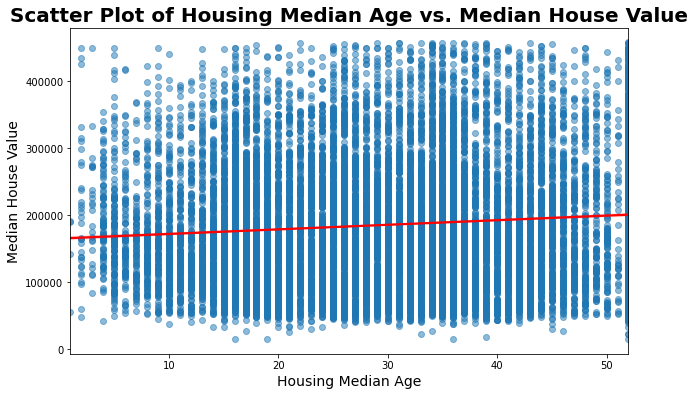

In [19]:
#scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='housing_median_age', y='median_house_value', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot of Housing Median Age vs. Median House Value', fontsize=20, fontweight='bold')
plt.xlabel('Housing Median Age', fontsize=14)
plt.ylabel('Median House Value', fontsize=14)
plt.show()

The red regression line has a slight upward tilt, so there is a weak positive relationship between housing median age and median house value. This means that typically, older houses have somewhat higher values (as shown by the higher median age) but it is not a strong relationship.

In [20]:
#Step 1: Create Income Segments

income_bins = [0, 2, 4, 6, 8, df['median_income'].max()]
income_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column 'income_segment' in the df
df['income_segment'] = pd.cut(df['median_income'], bins=income_bins, labels=income_labels, include_lowest=True)

In [21]:
#Step 2: Group by Income Segments

# Calculate mean median_house_value and population for each income segment
income_grouped = df.groupby('income_segment').agg({
    'median_house_value': 'mean',
    'population': 'mean'
}).reset_index()

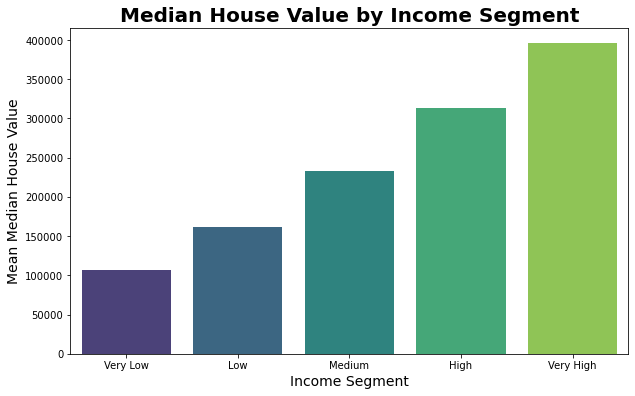

In [22]:
# Plotting Median House Value by Income Segment
plt.figure(figsize=(10, 6))
sns.barplot(x='income_segment', y='median_house_value', data=income_grouped, palette='viridis')
plt.title('Median House Value by Income Segment', fontsize=20, fontweight='bold')
plt.xlabel('Income Segment', fontsize=14)
plt.ylabel('Mean Median House Value', fontsize=14)
plt.show()

The plot clearly indicates a positive correlation between income levels and median house values. As household income increases, the average value of the houses in those segments also rises significantly. This trend suggests that wealthier segments of the population live in more expensive homes, which is consistent with general economic expectations., exceeding $400,000.

<AxesSubplot:>

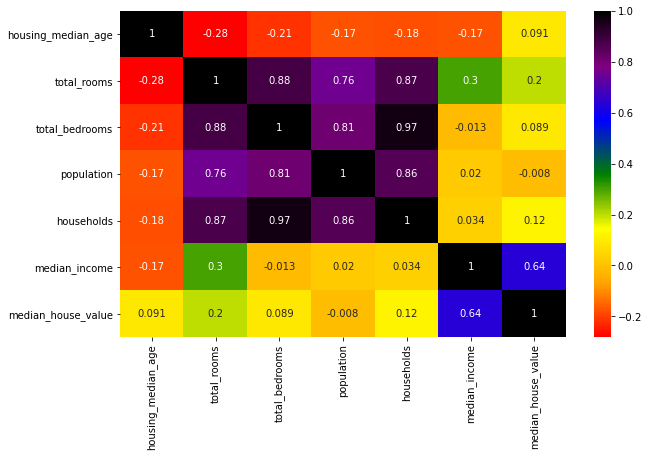

In [23]:
# Heatmap

selected_cols = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
input_data = df[selected_cols]

# Define a custom color palette & figure size
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom", ["red", "orange", "yellow", "green", "blue", "purple", "black"])
plt.figure(figsize=(10,6))


sns.heatmap(input_data.corr(), annot=True, cmap=custom_cmap)

About total_bedrooms, total_rooms have a very strong positive correlation (0.93), implying that houses with more rooms will have more bedrooms.

The number of households increases population at a high rate of 0.91 this is because the household number upsurges in an area which increases individuals residing there.

Median_income and median_house_value have a low positive relationship where areas with higher incomes are more likely to have expensive house prices.

Housing_median_age was related negatively with total_rooms (-0.36) showing that older houses sometimes were smaller in size.

However, there is a weak negative relationship between housing_median_age and median_income (-0.12), indicating that old homes can be found in low-income places sometimes.

# Data preprocessing 

In [24]:
# Impute using simpleimputer with pipeline
pipeline = Pipeline([
    ('mean_imputer', SimpleImputer(strategy='mean'))
])

df['total_bedrooms'] = pipeline.fit_transform(df[['total_bedrooms']])

In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,income_segment
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,High
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,Medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,Low
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700,Medium
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200,Low


# One Hot encoding

In [26]:
df = pd.get_dummies(df, columns=['ocean_proximity'], prefix='o_p', drop_first=True)


One-Hot Encoding: This method is often safer for non-ordinal categorical data, as it avoids introducing any false ordinal relationships. Each category is treated independently.

In [27]:
# dropping "income_segment" because it was only for visualization purpose.

df = df.drop(columns=['income_segment'])

## Splitting data into train and test

In [28]:
X = df.drop(columns=['median_house_value'])  # independent variables
y = df['median_house_value']  # target variable

In [29]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
# shape of the data after train-test split

print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(12676, 12) (4226, 12) (12676,) (4226,)


In [31]:
# Standardize the Data
scaler = StandardScaler()

In [32]:
# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [33]:
# Linear Regression
model_1 = LinearRegression()
model_1.fit(X_train_scaled, y_train)

# Predicting on train data
y_train_pred = model_1.predict(X_train_scaled)

# Evaluating the Model on train data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Mean Squared Error on train data: {train_mse}")
print(f"Root Mean Squared Error on train data: {train_rmse}")
print(f"R-squared on train data: {train_r2}")

# Predicting on test data
y_test_pred = model_1.predict(X_test_scaled)

# Evaluating the Model on test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error on test data: {test_mse}")
print(f"Root Mean Squared Error on test data: {test_rmse}")
print(f"R-squared on test data: {test_r2}")

Mean Squared Error on train data: 3105857691.092756
Root Mean Squared Error on train data: 55730.22242098766
R-squared on train data: 0.6290413437494968
Mean Squared Error on test data: 3309399007.3009644
Root Mean Squared Error on test data: 57527.3761551921
R-squared on test data: 0.6210452397314048


MSE is high on both the training and testing sets because of that the model does not accurately capture the relationship between the independent features and the target variable. Although our model is capturing 62% variance which means there is a moderate amount of fit between predicted and actual house prices.

## checking for linear regression assumptions

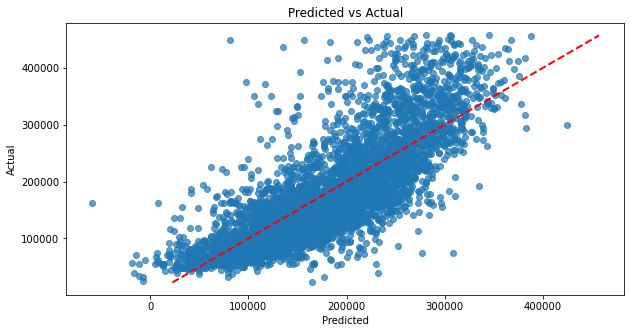

In [34]:
# 1.Linearity

residuals = y_test - y_test_pred   # residuals

plt.figure(figsize=(10, 5))
plt.scatter(y_test_pred, y_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.show()

The scatter plot is indicating generally a linear relationship as most of the points lie along the red line, as the actual price increases data points tend to spread out and even flatten at the top. 

This suggests that the model is not perfectly capturing relationships at higher values.

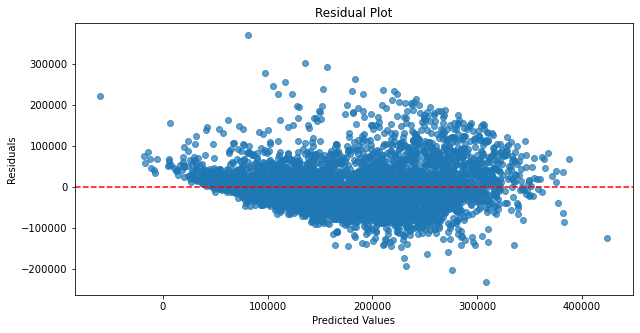

In [35]:
# 2. Homoscedasticity 
plt.figure(figsize=(10, 5))
plt.scatter(y_test_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

As we can see our graph it is a funnel type and errors are not evenly spread which voilates the assumption of Homoscedasticity and the above graph is of heteroscedasticity.

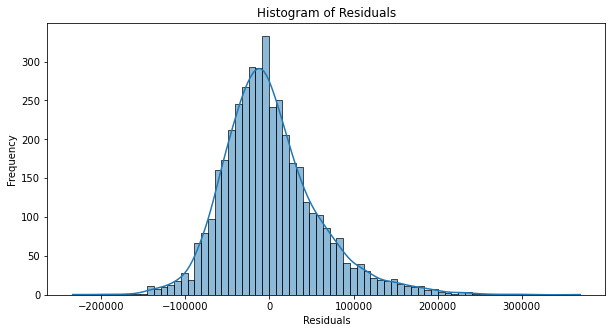

In [36]:
# 3. Normality of Residuals 

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

here we can see slightly right skewed but most errors are normally distributed so normality assumption is valid.

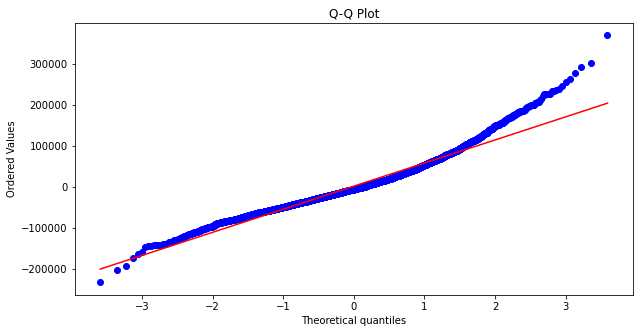

In [37]:
# Q-Q Plot for normality check
plt.figure(figsize=(10, 5))
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


In [38]:
# 4. Independence of Errors (Durbin-Watson Test)
dw_test = durbin_watson(residuals)
print(f'Durbin-Watson test statistic: {dw_test}')

Durbin-Watson test statistic: 1.994784721058759


Durbin-Watson test is used to detect Autocorrelation(Independence of Errors) which ranges from 0 to 4. 

A value of 1.99.0 indicates there is little to no autocorrelation detected in the sample. 
Values from 0 to less than 2 point to positive autocorrelation and values from 2 to 4 mean negative autocorrelation.

In [39]:
# 5. checking for multicollinearity
# independent_variables = df.select_dtypes(include=['number']) # in case of error use this line

independent_variables = X_train  

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_variables.columns
vif_data["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

print(vif_data)

              Variable         VIF
0            longitude  885.060449
1             latitude  819.964547
2   housing_median_age    8.824756
3          total_rooms   50.898543
4       total_bedrooms  102.813618
5           population   23.065587
6           households  109.948693
7        median_income   16.631465
8           o_p_INLAND    3.002993
9           o_p_ISLAND    1.002102
10        o_p_NEAR BAY    1.647362
11      o_p_NEAR OCEAN    1.354896


The VIF values that we have calculated show very high Multicollinearity in our dataset.

longitude and latitude indicate extreme multicollinearity because these two variables are highly correlated with each other as they both represent geographical locations.

total_rooms, total_bedrooms and households are also showing high Multicollinearity because they are showing or measuring similar aspects of a house.

population and median income show moderate to high multicollinearity.

housing_median_age, o_p_INLAND, o_p_ISLAND, o_p_NEAR BAY and o_p_NEAR OCEAN, these features have lower vif values which indicates that they are less correlated with each other in the dataset.

### Till Now:

Our linear regression model performed poorly on both training and testing data and several factors could be contributing to this outcome.

1. Outliers: outliers are present in our data due to this our features are skewed and have bi-model distribution and this is impacting the performance of the linear regression model.

2. Multicollinearity: Multicollinearity among the features leads to inflated standard errors of the coefficient. This makes it difficult for the model to correctly identify the true relationship between independent features and the target variable.

3. Heteroscedasticity: Previously we observed that heteroscedasticity is present in our data which violates one of the key assumptions of linear regression (Homoscedasticity) that the variance of errors is not constant across all levels of independent variables.

4. Complex Relationship: If the true relationship between target and independent features is complex, then a simple linear regression model might be too simplistic to capture the underlying pattern.

### In linear regression we are facing the issue of multicollinearity so to handle that we will use Ridge regression

# Ridge regression

In [40]:
# Initializing and fitting the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value as needed
ridge_model.fit(X_train_scaled, y_train)

# Making predictions
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

# Calculating MSE and R-squared for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculating MSE and R-squared for testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Printing the results
print(f"Training Data: MSE = {train_mse:.4f}, RMSE = {train_rmse:4f}, R² = {train_r2:.4f}")
print(f"Testing Data: MSE = {test_mse:.4f},  RMSE = {test_rmse:4f}, R² = {test_r2:.4f}")

Training Data: MSE = 3105858905.0053, RMSE = 55730.233312, R² = 0.6290
Testing Data: MSE = 3309335439.3016,  RMSE = 57526.823650, R² = 0.6211


Linear and Ridge regression are giving similar results and performing poorly on data so we will use tree-based algorithms like random forest regressor and XGBRegressor or GBM which capture complex relationships between independent and target variables.

# Random Forest Regressor

In [41]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions on the training and testing data
y_train_pred = rf_regressor.predict(X_train_scaled)
y_test_pred = rf_regressor.predict(X_test_scaled)
test_rmse = np.sqrt(test_mse)

# Calculate MSE and R-squared for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)


# Print the results including RMSE
print(f"Training Data: MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Testing Data: MSE = {test_mse:.4f}, RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")

Training Data: MSE = 247339301.1084, RMSE = 15727.0245, R² = 0.9705
Testing Data: MSE = 3309335439.3016, RMSE = 57526.8237, R² = 0.6211


As we see tree based algorithm random forest is performing way better than linear and ridge regression.

Random forest has explained 62% variance in test data and also significantly reduced mean squared error.

### Hyperparameter tunning for random forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor
rf1_regressor = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],            
    'max_depth': [10, 15, 20],                  
    'min_samples_split': [5, 10, 15],           
    'min_samples_leaf': [2, 4, 6],              
    'max_features': ['sqrt']                    
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf1_regressor, param_distributions=param_grid, 
                                   n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=2, 
                                   scoring='neg_mean_squared_error')

# Fit the model to the training data
random_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters found: ", best_params)

# Use the best model found by RandomizedSearchCV to make predictions
best_rf_model = random_search.best_estimator_

# Predictions on training and testing data
y_train_pred = best_rf_model.predict(X_train_scaled)
y_test_pred = best_rf_model.predict(X_test_scaled)

# Calculate MSE, RMSE, and R-squared for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate MSE, RMSE, and R-squared for testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training Data: MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Testing Data: MSE = {test_mse:.4f}, RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")

Fitting 8 folds for each of 10 candidates, totalling 80 fits
Best hyperparameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}
Training Data: MSE = 777895882.6778, RMSE = 27890.7849, R² = 0.9071
Testing Data: MSE = 2135167397.7214, RMSE = 46207.8716, R² = 0.7555


The result from hyperparameter tunning suggest that model performed well on train data but failed to genrealize to test data which indicates overfitting.

# XGB Regressor

In [43]:
# Initialize the XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', 
                                 n_estimators=100, 
                                 learning_rate=0.1, 
                                 max_depth=6, 
                                 random_state=42)

# Fit the model to the training data
xgb_regressor.fit(X_train_scaled, y_train)

# Make predictions on the training and testing data
y_train_pred = xgb_regressor.predict(X_train_scaled)
y_test_pred = xgb_regressor.predict(X_test_scaled)

# Calculate MSE, RMSE, and R-squared for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_r2 = r2_score(y_train, y_train_pred)

# Calculate MSE, RMSE, and R-squared for testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training Data: MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Testing Data: MSE = {test_mse:.4f}, RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")


Training Data: MSE = 1005310599.0235, RMSE = 31706.6334, R² = 0.8799
Testing Data: MSE = 1893062294.7637, RMSE = 43509.3357, R² = 0.7832


There is a slight increase in r^2 in xgboost algorithm than random forest, we can get more improvement with hyperparameter tunning.

## Hyperparameter tunning for XGB

In [73]:
# Initialize the XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_regressor, param_distributions=param_grid, 
                                   n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1,
                                   scoring='neg_mean_squared_error')

# Fit the model to the training data
random_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_xgb_params = random_search.best_params_
print("Best hyperparameters found: ", best_xgb_params)

# Use the best model found by RandomizedSearchCV to make predictions
best_xgb_model = random_search.best_estimator_

# Predictions on training and testing data
y_train_pred = best_xgb_model.predict(X_train_scaled)
y_test_pred = best_xgb_model.predict(X_test_scaled)

# Calculate MSE, RMSE, and R-squared for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate MSE, RMSE, and R-squared for testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training Data: MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Testing Data: MSE = {test_mse:.4f}, RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters found:  {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Training Data: MSE = 1030278783.6655, RMSE = 32097.9561, R² = 0.8769
Testing Data: MSE = 1875818035.2993, RMSE = 43310.7150, R² = 0.7852


The results from hyperparameter tunning for xgboost model suggest that there is no difference in performance of model after hyperparameter tunning.

## Ensemble Model- Adaboost Regressor

In [45]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Define the base estimator
base_estimator = DecisionTreeRegressor()

# Define the AdaBoost Regressor model
ada_regressor = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 1.0],  # Weight applied to each regressor at each boosting iteration
    'base_estimator__max_depth': [3, 5, 7]  # Maximum depth of the decision trees
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=ada_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters found: {best_params}")

Best hyperparameters found: {'base_estimator__max_depth': 7, 'learning_rate': 0.1, 'n_estimators': 50}


In [46]:
# Train the best AdaBoost Regressor model
best_ada_regressor = grid_search.best_estimator_

# Make predictions
y_train_pred = best_ada_regressor.predict(X_train_scaled)
y_test_pred = best_ada_regressor.predict(X_test_scaled)


train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Data: MSE = {train_mse:.4f},RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Testing Data: MSE = {test_mse:.4f}, RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")


Training Data: MSE = 2227429962.5236,RMSE = 47195.6562, R² = 0.7340
Testing Data: MSE = 2794708024.3089, RMSE = 52864.9981, R² = 0.6800


## Model Comparison for both train and test data, Metrics used RMSE and R².

In [58]:
model_names = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'XGBoost', 'AdaBoost']

train_rmse = [55730.23, 55730, 27890.78, 32097.95, 47195]
test_rmse = [57527.378, 57526, 46207.87, 43310.7, 52864.99]

train_r2 = [0.62, 0.62, 0.90, 0.87, 0.73]
test_r2 = [0.62, 0.62, 0.75, 0.78, 0.68]

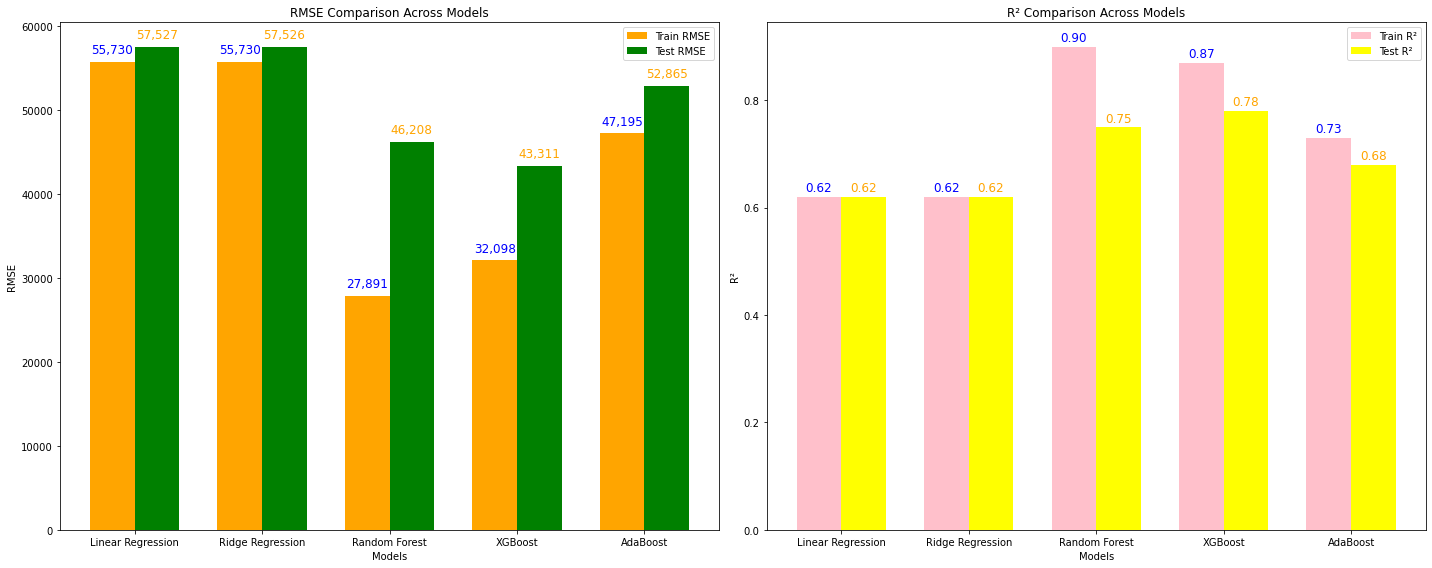

In [71]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Bar width
bar_width = 0.35
index = np.arange(len(model_names))

# Plot RMSE
axs[0].bar(index, train_rmse, bar_width, label='Train RMSE', color='orange')
axs[0].bar(index + bar_width, test_rmse, bar_width, label='Test RMSE', color='green')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('RMSE')
axs[0].set_title('RMSE Comparison Across Models')
axs[0].set_xticks(index + bar_width / 2)
axs[0].set_xticklabels(model_names)
axs[0].legend()

# Display RMSE values on the bars
for i in range(len(model_names)):
    axs[0].text(i, train_rmse[i] + 1000, f'{train_rmse[i]:,.0f}', ha='center', color='b', fontsize=12)
    axs[0].text(i + bar_width, test_rmse[i] + 1000, f'{test_rmse[i]:,.0f}', ha='center', color='orange', fontsize=12)
    
    
    # Plot R²
axs[1].bar(index, train_r2, bar_width, label='Train R²', color='pink')
axs[1].bar(index + bar_width, test_r2, bar_width, label='Test R²', color='yellow')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('R²')
axs[1].set_title('R² Comparison Across Models')
axs[1].set_xticks(index + bar_width / 2)
axs[1].set_xticklabels(model_names)
axs[1].legend()

# Display R² values on the bars
for i in range(len(model_names)):
    axs[1].text(i, train_r2[i] + 0.01, f'{train_r2[i]:.2f}', ha='center', color='b', fontsize=12)
    axs[1].text(i + bar_width, test_r2[i] + 0.01, f'{test_r2[i]:.2f}', ha='center', color='orange', fontsize=12)

plt.tight_layout()
plt.show()


#### These two bar charts compare the performance of five different regression models (Linear Regression, Ridge Regression, Random Forest, XGboost, and Adaboost Regressor) using the metrics RMSE and R² for both training and testing dataset.

### RMSE Comparison Across Models:

* Y-Axis:* RMSE (Root Mean Squared Error) values.

* Each pair of bars represents the Train RMSE (orange) and Test RMSE (green) for a particular model.

**Linear and Ridge Regression:** Both Models have similar RMSE values for training and testing, indicating they are behaving similarly. High RMSE suggest that these models are not fitting the data as well as the others.

**Random Forest:** Shows a significant difference between Train RMSE (lower) and Test RMSE (higher). This indicates potential overfitting, where the model is performing better on the training data than on the test data.

**XGBoost:** Has the lowest RMSE among all models, indicating that it is the best performing model on the test data.

**Adaboost:** Shows a significant difference between Train RMSE and Test RMSE, indicating that it might be overfitting.

### R² Comparison

* Y-Axis: R² values.
* Bars: Each set of bars corresponds to Train R² (pink) and Test R² (yellow) relating to a specific model.

Findings:

**Linear Regression and Ridge Regression:** These models both have an R² for Train and Test equaling 0.62, which implies they provide explanation to 62% of the variance. It is possible that these two models are too simplistic for this dataset.

**Random Forest:** High train R²(0.90), but low test R²(0.75). This confirms overfitting observed in RMSE comparison.

**XGBoost:** It has a good balance between the Training(0.87) and Testing(0.78) sets, as well as low RMSE score, indicating it is the best generalizing model.

**AdaBoost:** There is a significant drop from Train R^2(0.73) to TestR^2(0.68). This means that there is an overfitting problem with AdaBoost model.

## Conclusion:

* XGBoost: Based on its performance in terms of both RMSE and R-squared metrics, it appears to be performing better than any other model, indicating that it can generalize well with new data or unseen data sets.


* Random Forest and AdaBoost: These models seem not effective since their performances on training data differ significantly from their testing data the random forest had high error rates while ada boost was more accurate.


* Linear Regression and Ridge Regression: They do not fit the data based on the relatively high root mean square errors(RMSEs) * plus low adjusted coefficients of determination(R-squareds).

## Reason Why XGBoost Performed better:

* **Gradient Boosting:** XGBoost is an implementation of gradient boosting that aims to improve predictions by aggregating the outcomes of many weak learners, which are often decision trees. Another tree in the sequence attempts to correct mistakes made by all predecessors and thus producing a more accurate model on average.


* **Residual Learning:** In every iteration, it tries to minimize the residuals left in the previous models by giving out predicted values; thus refine and improve its own prediction iteratively.


* **L1 and L2 Regularization**: XGBoost includes L1 (Lasso) and L2 (Ridge) regularization terms in its objective function, which helps prevent overfitting by penalizing large coefficients. This ensures that the model remains generalizable to new data.


**Summary:**

* XGBoost has shown superior performance compared with other algorithms in our study, because of its advanced boosting algorithm, effective regularization techniques. This makes it possible for XGBoost to capture intricate patterns in data thereby generalizing well on unseen data as reflected in low RMSE and high R2 scores during the evaluation.